In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRC4x6mecC7EkofiP3uJWZ3Y1jD1B2QMZXjlFtdP9-TOan6Fms2TqyOyssHegjTeG7iM6f-qX89vfvK/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Biomass']=df['Biomass'].dropna()

In [3]:
# Fit the Triple Exponential Smoothing model
model = sm.tsa.ExponentialSmoothing(df['Biomass'], trend='add', seasonal='add', seasonal_periods=12, damped_trend=True).fit(optimized=True)

# Print model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Biomass   No. Observations:                   84
Model:             ExponentialSmoothing   SSE                          59988.431
Optimized:                         True   AIC                            585.972
Trend:                         Additive   BIC                            627.295
Seasonal:                      Additive   AICC                           597.847
Seasonal Periods:                    12   Date:                 Wed, 06 Dec 2023
Box-Cox:                          False   Time:                         20:44:01
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6175153                alpha                 True
smoothing_trend          

In [4]:
# In-sample predictions
in_sample_preds = model.fittedvalues

# Calculate error metrics
mse = mean_squared_error(df['Biomass'], in_sample_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['Biomass'], in_sample_preds)
r2 = r2_score(df['Biomass'], in_sample_preds)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")


MSE: 714.1479854464219, RMSE: 26.72354739637726, MAE: 20.421655042575452, R-squared: 0.7228407337408167


In [5]:
# Forecast future values
future_periods = 30
forecast = model.forecast(future_periods)
future_dates = pd.date_range(start=df.index[-1], periods=future_periods + 1, freq='M')[1:]
forecast_series = pd.Series(forecast, index=future_dates)


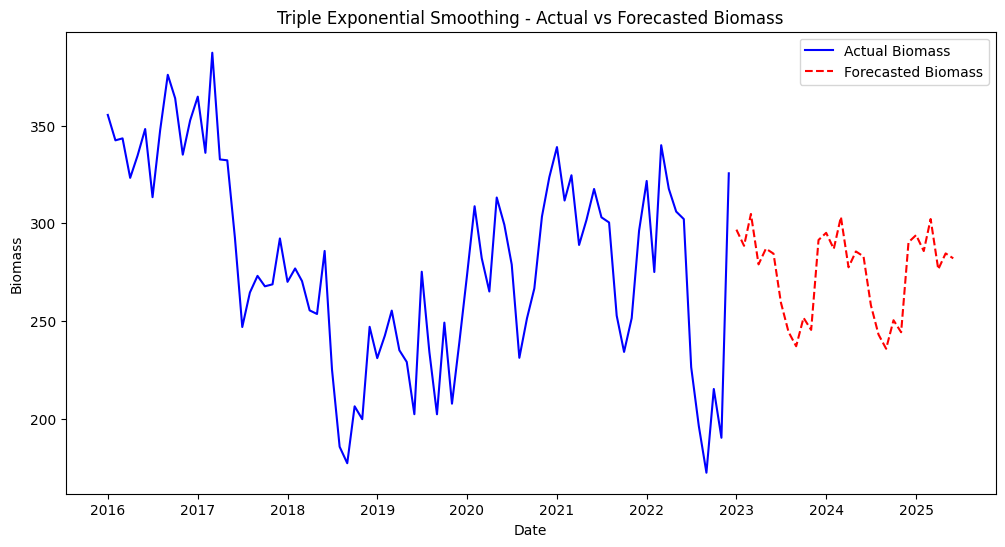

In [8]:
# Plotting the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Biomass'], label='Actual Biomass', color='blue')
plt.plot(forecast, label='Forecasted Biomass', color='red', linestyle='dashed')
plt.title('Triple Exponential Smoothing - Actual vs Forecasted Biomass')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.legend()
plt.show()


In [9]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate MAPE given the actual and predicted values.

    :param y_true: The actual values
    :param y_pred: The predicted values
    :return: The MAPE value
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example usage
mape = mean_absolute_percentage_error(df['Biomass'], in_sample_preds)
print(f"MAPE: {mape}%")


MAPE: 7.544250732744126%
